In [1]:
import os

imdb_dir = r'D:\Final\code\LAB\keras\IMBD_dataset\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [40]:
print(len(texts))

25000


In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.1.0'

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen=100
training_samples=200
validation_samples=1000
max_words=10000

tokenizer=Tokenizer(num_words=10000) #處理10000個最常用單字
tokenizer.fit_on_texts(texts)#建立字典
sequences=tokenizer.texts_to_sequences(texts)#單字轉換成鍵值

print(sequences[0])

[282, 171, 443, 6416, 45, 3585, 41, 3, 15, 17, 222, 1109, 72, 1803, 1171, 36, 1, 1353, 1366, 2127, 861, 4, 63, 46, 23, 52, 170, 9, 39, 115, 22, 460, 42, 99, 4, 1, 101, 87, 4, 180, 25, 3542, 8, 1, 4446, 2, 108, 23, 1660, 409, 20, 2, 91, 1508, 366, 71, 307, 31, 63, 56, 9, 115, 22, 460, 1, 108, 73, 143, 62, 460, 42, 6, 3, 52, 8448, 7753, 1, 459, 6, 28, 286, 121, 14, 551, 35, 1204, 237, 125, 72, 245, 331, 182, 85, 2, 269, 54, 3586, 4, 3, 4446, 24, 64, 739, 5, 27, 1920, 123, 6416, 428, 50, 73, 23, 69, 523, 1, 289, 95, 224, 4, 11, 3648, 6416, 741, 180, 30, 42, 3542, 73, 23, 562, 134, 7753, 6, 2108, 5, 27, 1, 118, 16, 54, 2538, 38, 54, 1490, 135, 10, 13, 30, 9, 98, 78, 5, 387, 36, 1629, 10, 121, 32, 522, 8]


In [41]:
word_index=tokenizer.word_index #文字與索引的詞彙表
print(len(word_index))

87393


In [6]:
j=0
for k,v in word_index.items():
    if j == 10:
        break
    j+=1
    print(k,v)

the 1
and 2
a 3
of 4
to 5
is 6
br 7
in 8
it 9
i 10


In [7]:
import numpy as np
data=pad_sequences(sequences,maxlen=maxlen) #取評論的後100個字
labels=np.asarray(labels) #標籤張量

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [8]:
print(data[:3])

[[  34   44 7576 1414   15    3 4252  514   43   16    3  633  133   12
     6    3 1301  459    4 1751  209    3 7693  308    6  676   80   32
  2137 1110 3008   31    1  929    4   42 5120  469    9 2665 1751    1
   223   55   16   54  828 1318  847  228    9   40   96  122 1484   57
   145   36    1  996  141   27  676  122    1  411   59   94 2278  303
   772    5    3  837   20    3 1755  646   42  125   71   22  235  101
    16   46   49  624   31  702   84  702  378 3493    2 8422   67   27
   107 3348]
 [4311   44  298  234    9   13    3 1319    5  320    8   11   28   55
   731 2280  588 1339  269  151   79   28   55  731 2280  844 2105  269
  1816  134 2682 1365  844    6  345  114    5   78   47   23  955    4
    82 1076 1586    5  165   43   15   96    7    7 4517    6    1   88
  1685    4    1  286 4517  105   35  227   10  420    1 1005  493    9
    57   45   33   68    3  224  706    1  362 1898  455  149  335  148
     3   19   41    3 1702   40 1609   27   11  354

In [9]:
indices = np.arange(data.shape[0])  # 將資料拆分為訓練集和驗證集, 但首先要將資料打散, 因為所處理的資料是有順序性的樣本資料 (負評在前, 然後才是正評)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [10]:
print(data[:3])

[[ 372  133   45  229    1   45   11 2878 2979   63  116   65 3774    2
  4644 1344  392   30   53   12 2543    2  257    3 1840  248  392   16
     9  156 7024    9    5    1   82  179    9  211   54  125   14   70
    51    1  129   16    1    8  243  157  354    2 1659 4949  717    7
     7 1291 4186    4  261   12    1  518   55    6 5855   71  801 6175
    60    6  231   39  326  426    1 4589 3422  134 6006 1957   91  750
  6350  695 2965   62  813    2 3607 1264   77 1173  117   54  448   89
   434   55]
 [  65 1827    8 2934   39 1197    1  748    8 6124    7    7   47   23
    50 7953   18    1 8103  678 5819   15  896  854   77   21 1737   69
     5 1025   29    4   95   35   10   77  488   16    1  210  109   90
    12   10  158  355   11   17   14    3  548    4  189   10  101    9
  1870  257  107    1  201  198    2   99 6881   23  137 1083   10   13
  1379   15  139    3  173  125   71   11    7    7    1  201   13    3
   173   50 3487    2 4542   71   11  409  202 3678

# 解析glove.6B.100d，構建一個索引字典，將文字投射到對應的向量表示法

In [11]:
glove_dir = r'D:\Final\code\LAB\keras\glove_6B\glove.6B'

embeddings_index = {} #建立嵌入向量索引字典，儲存 字 : 向量
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32') #將座標轉換成 Numpy array
    embeddings_index[word] = coefs
    
f.close()
print(len(embeddings_index))

400000


In [12]:
print(embeddings_index.get('the'))
print(len(embeddings_index['the']))

[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.27062 ]

# 準備GloVe文字嵌入向量矩陣

In [13]:
embeddings_dim = 100
embeddings_matrix = np.zeros((max_words,embeddings_dim))
print(embeddings_matrix.shape)

for word,i in word_index.items():
    if i < max_words:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None :
            embeddings_matrix[i] = embeddings_vector

(10000, 100)


In [14]:
print(embeddings_matrix[1])

[-0.038194   -0.24487001  0.72812003 -0.39961001  0.083172    0.043953
 -0.39140999  0.3344     -0.57545     0.087459    0.28786999 -0.06731
  0.30906001 -0.26383999 -0.13231    -0.20757     0.33395001 -0.33848
 -0.31742999 -0.48335999  0.1464     -0.37303999  0.34577     0.052041
  0.44946    -0.46970999  0.02628    -0.54154998 -0.15518001 -0.14106999
 -0.039722    0.28277001  0.14393     0.23464    -0.31020999  0.086173
  0.20397     0.52623999  0.17163999 -0.082378   -0.71787    -0.41531
  0.20334999 -0.12763     0.41367     0.55186999  0.57907999 -0.33476999
 -0.36559001 -0.54856998 -0.062892    0.26583999  0.30204999  0.99774998
 -0.80480999 -3.0243001   0.01254    -0.36941999  2.21670008  0.72201002
 -0.24978     0.92136002  0.034514    0.46744999  1.10790002 -0.19358
 -0.074575    0.23353    -0.052062   -0.22044     0.057162   -0.15806
 -0.30798    -0.41624999  0.37972     0.15006    -0.53211999 -0.20550001
 -1.25259995  0.071624    0.70564997  0.49744001 -0.42063001  0.26148
 -

In [15]:
model=keras.Sequential([
    keras.layers.Embedding(max_words,embeddings_dim,input_length=maxlen), #(可能的token數, 嵌入向量維度, input_length)
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.6924 - acc: 0.5150 - val_loss: 0.6917 - val_acc: 0.5170
Epoch 2/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.5041 - acc: 0.9700 - val_loss: 0.6965 - val_acc: 0.5030
Epoch 3/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.2856 - acc: 0.9850 - val_loss: 0.7038 - val_acc: 0.5160
Epoch 4/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.1304 - acc: 1.0000 - val_loss: 0.7170 - val_acc: 0.5190
Epoch 5/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.0650 - acc: 1.0000 - val_loss: 0.7060 - val_acc: 0.5210
Epoch 6/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.0330 - acc: 1.0000 - val_loss: 0.7091 - val_acc: 0.5280
Epoch 7/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.0184 - acc: 1.0000 - val_loss: 0.7193 - val_acc: 0.5190
Epoch 8/10
200/

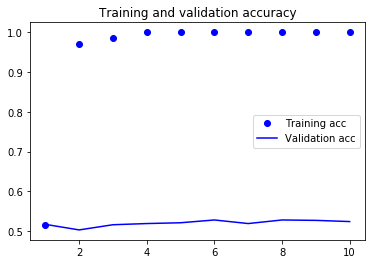

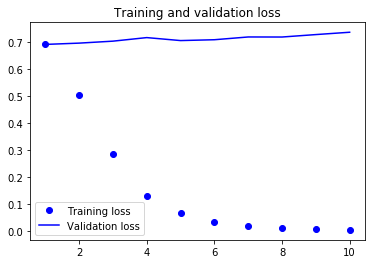

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# 模型中載入GLOVE嵌入向量

In [18]:
model=keras.Sequential([
    keras.layers.Embedding(max_words,embeddings_dim,input_length=maxlen), #(可能的token數, 嵌入向量維度, input_length)
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers[0].set_weights([embeddings_matrix]) # 嵌入向量層/設定權重/載入GloVe權重矩陣
model.layers[0].trainable = False #凍結該層，避免更新

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 1000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/sample - loss: 1.6268 - acc: 0.5050 - val_loss: 0.6961 - val_acc: 0.5110
Epoch 2/10
200/200 [==============================] - 0s 793us/sample - loss: 0.5824 - acc: 0.6650 - val_loss: 0.9114 - val_acc: 0.5080
Epoch 3/10
200/200 [==============================] - 0s 798us/sample - loss: 0.5325 - acc: 0.7850 - val_loss: 1.5001 - val_acc: 0.4920
Epoch 4/10
200/200 [==============================] - 0s 783us/sample - loss: 0.4917 - acc: 0.7550 - val_loss: 0.8681 - val_acc: 0.5220
Epoch 5/10
200/200 [==============================] - 0s 768us/sample - loss: 0.2698 - acc: 0.9050 - val_loss: 0.7027 - val_acc: 0.5620
Epoch 6/10
200/200 [==============================] - 0s 750us/sample - loss: 0.1754 - acc: 0.9750 - val_loss: 1.6215 - val_acc: 0.4920
Epoch 7/10
200/200 [==============================] - 0s 753us/sample - loss: 0.2526 - acc: 0.9150 - val_loss: 0.7840 - val_acc: 0.5330
Epo

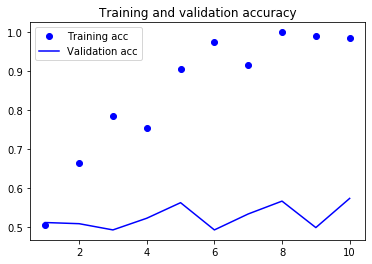

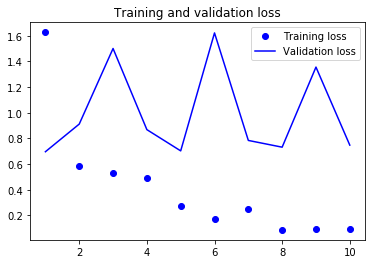

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


# 測試資料

In [22]:
test_dir = os.path.join(imdb_dir,'test')
labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name = os.path.join(test_dir,label_type)#開 neg or pos 資料夾
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else :
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts) #單字轉鍵值
x_test = pad_sequences(sequences, maxlen=maxlen)#取後100個單字
y_test = np.asarray(labels)#標籤向量化

In [23]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 101us/sample - loss: 0.7533 - acc: 0.5717


[0.7532812003326416, 0.57172]